# K-Nearest Neighbors
Agenda today:
- Distance Metrics
    - Manhattan Distance
    - Euclidean Distance
    - Minkowski Distance
- K-Nearest Neighbors
    - How it works
    - Implementing KNN using sklearn
    - Evaluating your knn with evaluation metrics
    - Hyperparameter tuning

____
#### Parametric vs. Nonparametric models 
The difference between parametric models (such as Linear regression, Linear Discriminant Analysis) and non-parametric models (KNN, K-means, decision tree) is that parametric models make certain assumptions of the underlying data distribution. Nonparametric models allow us to apply the models to data that are not normally distributed. Therefore, if some assumptions of your data is not met, you can use non-parametric algorithms. An important note: we only say whether our models are parametric, not our data. 


___
## Part I. Distance Metrics
 
#### Manhattan Distance
The Manhattan distance is the sum of the absolute values of the Cartesian coordinates. You can think of Manhattan distance as moving through **grids**. In the image below, only the green line is infeasible to calculate the Manhattan distance. The equation for calculating Manhattan distance is

$$D(x,y) = \sum_{k=1}^{n} {|x_k - y_k|}$$

<img src="../resources/manhatten-distance.webp" style="width:500px;">

In [1]:
# an example for calculating the manhattan distance
import numpy as np
point_a = (2,4)
point_b = (-1,5)
manhattan_dis = 0
for i in range(len(point_a)):
    manhattan_dis +=  np.abs(point_a[i] - point_b[i])

In [2]:
manhattan_dis

4

#### Euclidean Distance
Euclidean distance is the shortest distance between two points, and it is the most common used distance metrics. To calculate the Euclidean distance between two coordinates a(x1,y1) and b(x2,y2), the formula is:
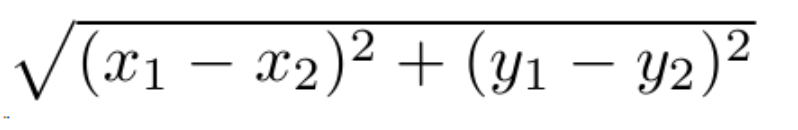

General formula for n-dimensional calculation:
$$d(x,y) = \sqrt[2]{\sum_{k=1}^{n}{(x_k - y_k)^2}}$$



In [3]:
# an example of calculating Euclidean distance 
euclidean_dist = 0
for i in range(len(point_a)):
    euclidean_dist += (point_a[i] - point_b[i])**2
euclidean_dist =  np.sqrt(euclidean_dist)
euclidean_dist

3.1622776601683795

#### Minkowski Distance
Minkowski distance is a generalized format for calculating distance in n-dimensional normed vector space. It takes on the formula of:

$$d(x,y) = \sqrt[r] {\sum_{k=1}^{n}{(x_k - y_k)^r}}$$

As you can see, the Manhattan Distance and Euclidean distance are special cases of the Minkowski Distance. The Manhattan distance takes on the notation of l1 norm and Euclidean distance takes on the notation of l2 norm. What does this remind you of?

#### Manhattan Distance is the sum of all side lengths to the first power

manhattan_distance = (length_side_1 + length_side2 + ...+ length_side_n)**1  

#### Euclidean Distance is the square root of the sum of all side lengths to the second power

euclidean_distance = np.sqrt((length_side_1 + length_side2 + ...+ length_side_n)**2)

#### Minkowski Distance with a value of 3 would be the cube root of the sum of all side lengths to the third power

minkowski_distance_3 = np.cbrt((length_side_1 + length_side2 + ...+ length_side_n)**3)

## Part II. The Algorithm
KNN is a simple, nonparametric, and lazy algorithm used for both regression and classification. It is nonparametric because it doesn't make any assumption of the underlying data distribution, and it is **lazy** because it doesn’t learn a discriminative function from the training data but “memorizes” the training dataset instead. The algorithm ascribes class membership based on the closest k neighbors to the testing observation concerned. KNN is a similarity based algorithm - the class membership of the observation depends on the feature similarity to training observations. 

# K-5 Example:

<img src="../resources/KNN-Classification.gif" style="width:500px;">

GIF thanks to [MLK](https://machinelearningknowledge.ai/k-nearest-neighbor-classification-simple-explanation-beginners)


As mentioned above, the similarity depends on the distance of observations from each other, which can be calculated using any of the distance metrics mentioned above. The most commonly used distance metric is the Euclidean distance. However, **which distance metric you use** as well as the **value of k** could affect the performance of your model. The decision boundary can change accordingly to different values of K. 

# Implementing KNN

- 150 **observations**
- 4 **features** (sepal length, sepal width, petal length, petal width)
- **Response** variable is the iris species
- **Classification** problem since response is categorical
- More information in the [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/Iris)


### 1. Load in the data

In [4]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

In [5]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


### 2. Import the class you plan to use

In [6]:
from sklearn.neighbors import KNeighborsClassifier

### 3. Instantiate the classifier

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [7]:
knn = KNeighborsClassifier(n_neighbors=1)
# the n_neighbors is the parameter where you specify k

### 4. Fit the model!
- Model is learning the relationship between X and y
- Occurs in-place


In [8]:
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

### 5. Make predictions

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process
- Returns a NumPy array
- Can predict for multiple observations at once

In [9]:
knn.predict([[3, 5, 4, 2]])

array([2])

In [10]:
X_new = [[3, 5, 4, 2], [5, 4, 3, 2]]
knn.predict(X_new)

array([2, 1])

In [11]:
# tuning the k parameter 
# instantiate the model (using the value K=5) to see differences 
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X, y)

# predict the response for new observations
knn.predict(X_new)

array([1, 1])

# Putting it all together...

## Scale your data!:

Since KNN makes predictions based on nearest neighbors, data which is on different scales in different dimensions (read 'features') will confuse the algorithm.  Those features with higher variance will dominate the outcomes as every point MUST be nearby neighbors on that high variance dimension in order to be nearby on any other dimensions.  Therefor scaling is necessary on data with features on different scales.

In [12]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

# store feature matrix in "X"
X = iris.data

# store response vector in "y"
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
scaler = StandardScaler()  
scaler.fit(X_train)

# As always, NEVER fit transformers on test data.
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  


model = KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)


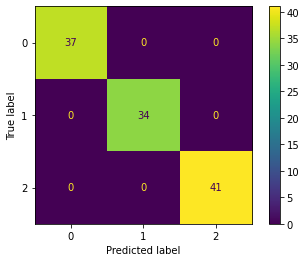

In [13]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
plot_confusion_matrix(model, X_train, y_train)

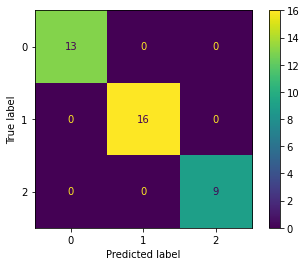

In [14]:
plot_confusion_matrix(model, X_test, y_test)

In [15]:
print(classification_report(y_train, model.predict(X_train)))
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        41

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00         9

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



## Hyperparameter Tuning: What value of k?

In [16]:
# search for an optimal value of K for KNN
import pandas as pd
from IPython.display import display
k_range = list(range(1, 41))
k_train_scores = []
k_test_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k) # number of neighbors updates!
    knn.fit(X_train, y_train)
    k_train_scores.append(knn.score(X_train, y_train))
    k_test_scores.append(knn.score(X_test, y_test))

print('Train scores by K')
display(pd.DataFrame(k_train_scores, index=k_range).head(10))
print('Test scores by K')
display(pd.DataFrame(k_test_scores, index=k_range).head(10))

Train scores by K


,0
1,1.000000
2,0.964286
3,0.946429
4,0.946429
5,0.955357
6,0.964286
7,0.946429
8,0.946429
9,0.946429
10,0.946429


Test scores by K


,0
1,1.000000
2,1.000000
3,1.000000
4,1.000000
5,0.973684
6,1.000000
7,0.973684
8,1.000000
9,1.000000
10,1.000000


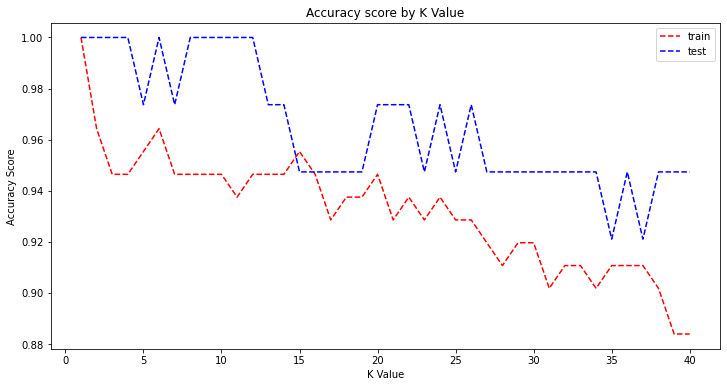

In [17]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 41), k_train_scores, color='red', linestyle='dashed', label='train')
plt.plot(range(1, 41), k_test_scores, color='blue', linestyle='dashed', label='test')
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.legend()
plt.show()

## How does the number of K affect the bias variance tradeoff?

<img src="../resources/K-judgement.webp" width="500">
<img src="../resources/K-judgement2.webp" width="500">


<img src="../resources/K-NN_Neighborhood_Size_print.png" width="700">

# Considerations when choosing to use K-Nearest Neighbors models:

1. KNN suffers badly from the 'Curse of Dimensionality'.  This means it performs worse on data with more features.  This is because as more dimensions are added, the clusters representing the classes spread out and it is less and less likely that the right neighbors are nearby to vote the new data into the correct class.

[More on KNN and the Curse of Dimensionality](https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote02_kNN.html) from Cornell University

2. KNN calculates the distance between every training example for every prediction.  This means it slows down as more training examples are added.  KNN is appropriate for smaller datasets in order make predictions in reasonable time.


3. As we said above, each feature in the data that a KNN model trains on must be on a similar scale.  Scaling is important before modeling.

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)
- Distance metrics for categorical variables 
- Precision and Recall for [multiclass problem](https://stats.stackexchange.com/questions/51296/how-do-you-calculate-precision-and-recall-for-multiclass-classification-using-co)
- [KNN for regression](https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/)

# BONUS:  Pipelines!!

For K-Nearest Neighbors models, it's important to scale our data.  We also previously learned the value of using cross-validation.

**But, how do we prevent data leakage when scaling for cross-validation??**

There are 2 ways:

1. We can use a K-fold generator and a for-loop, re-fit the scaler on each fold, and then transform the validation split each time.

2. Or, we can use a pipeline!

Pipelines are fun and easy, and you should always use them.

## Pipelines

A Pipeline object behaves just like an estimator when used in other scikit-learn (sklearn) functions.  However, it can contain the entire data preprocessing process as well as the estimator.

The benefit of this is that a pipeline will prevent data leakage in cross-validation.  It will be smart and only fit the transformers, like StandardScaler, on training folds and one only the transform method on testing folds.  This prevents data from the your testing set, such as the mean and variance, to leak into your training set and giving your model and unfair advantage.

## Use pipelines!

## Pop Quiz:

**Why do we use cross-validation?**

In [22]:
#__SOLUTION__

#Cross validation helps identify overfitting and prevents us from being fooled about our model's accuracy by a
#test split that is not representative of our whole dataset.

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()

#clf means classifier, you'll see this a lot
clf = KNeighborsClassifier(n_neighbors=1)

#steps should be a list of tuples, with a name for the step first and the object second.  The estimator comes last.
#the transformers will be applied in the order they appear.
steps = [('scaler', scaler), ('model', clf)]

#the pipeline is then instantiated with the steps.
pipe = Pipeline(steps=steps)

cross_val_score(pipe, X_train, y_train)

array([0.91304348, 0.95652174, 0.95454545, 1.        , 0.81818182])

# Accessing the steps in the pipeline:

The tuples in list provided to the `steps=` argument for the Pipeline include a name for each step.  This name can be used to access a particular transformer or model to inspect it, or set parameters.

In [19]:
pipe.steps

[('scaler', StandardScaler()), ('model', KNeighborsClassifier(n_neighbors=1))]

In [20]:
pipe['model'].get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

# Parameter Tuning and Cross Validation

Above we used a for loop to tune the k value, or the n_neighbors value, for the KNN.  We can do this with a pipeline, too.

,1,2,3,4,5,average
1,0.913043,0.956522,0.954545,1.000000,0.818182,0.928458
2,0.913043,0.956522,0.954545,0.954545,0.818182,0.919368
3,0.956522,0.956522,0.954545,1.000000,0.909091,0.955336
4,0.956522,0.956522,0.954545,1.000000,0.909091,0.955336
5,0.913043,0.956522,0.954545,1.000000,0.909091,0.946640
6,0.913043,0.956522,0.954545,1.000000,0.909091,0.946640
7,0.913043,0.956522,0.954545,1.000000,0.863636,0.937549
8,0.913043,0.956522,0.954545,1.000000,0.863636,0.937549
9,0.913043,0.956522,0.909091,1.000000,0.863636,0.928458
10,0.913043,0.956522,0.954545,1.000000,0.863636,0.937549


<AxesSubplot:>

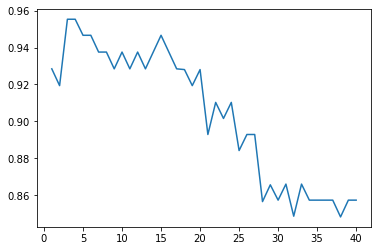

In [21]:
# search for an optimal value of K for KNN

#k values to try
k_range = list(range(1, 41))

#cross validation folds
cv = 5

#k_cross_val_scores will be a list of arrays of size 'cv'
k_cross_val_scores = []

scaler = StandardScaler()
knn = KNeighborsClassifier(n_neighbors=k) # number of neighbors updates!
steps = [('scaler', scaler), ('model', knn)]
pipe = Pipeline(steps=steps)

#iterate over k_range and change the n_neighbors argument for each k
for k in k_range:
    pipe['model'].set_params(n_neighbors=k)
    cross_val_scores = cross_val_score(pipe, X_train, y_train, cv=cv)
    k_cross_val_scores.append(cross_val_scores)

#set the results to a dataframe for easy viewing, rows will be k values and columns will be folds
scores = pd.DataFrame(k_cross_val_scores, index=k_range, columns=list(range(1,cv+1)))

#create a new column to hold the average score over folds for each k value
scores['average'] = scores.mean(axis=1)
display(scores)

#graph the average accuracy of each fold over each k value.
scores['average'].plot()

In [ ]:
pipe['model'.set_params(n_)